# Building A Handwritten Digits Classifier

In [1]:
from sklearn.datasets import load_digits
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
%matplotlib inline

digits_data = load_digits()

In [2]:
digits_data

{'DESCR': "Optical Recognition of Handwritten Digits Data Set\n===================================================\n\nNotes\n-----\nData Set Characteristics:\n    :Number of Instances: 5620\n    :Number of Attributes: 64\n    :Attribute Information: 8x8 image of integer pixels in the range 0..16.\n    :Missing Attribute Values: None\n    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)\n    :Date: July; 1998\n\nThis is a copy of the test set of the UCI ML hand-written digits datasets\nhttp://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits\n\nThe data set contains images of hand-written digits: 10 classes where\neach class refers to a digit.\n\nPreprocessing programs made available by NIST were used to extract\nnormalized bitmaps of handwritten digits from a preprinted form. From a\ntotal of 43 people, 30 contributed to the training set and different 13\nto the test set. 32x32 bitmaps are divided into nonoverlapping blocks of\n4x4 and the number of on pixels ar

In [3]:
digits_data.keys()

dict_keys(['images', 'target_names', 'data', 'DESCR', 'target'])

In [4]:
labels = pd.Series(digits_data["target"])
data = pd.DataFrame(digits_data["data"])
data.head()

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0


In [5]:
first_image = data.iloc[0]
np_image = first_image.values
np_image = np_image.reshape(8,8)

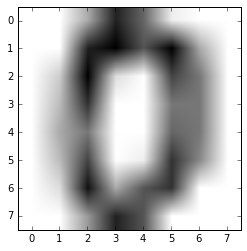

In [6]:
plt.imshow(np_image, cmap='gray_r')

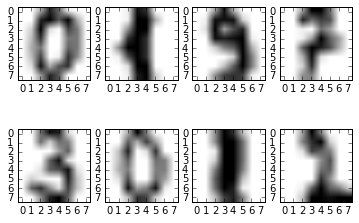

In [7]:
f, axarr = plt.subplots(2,4)

axarr[0,0].imshow(data.iloc[0].values.reshape(8,8), cmap='gray_r')
axarr[0,1].imshow(data.iloc[99].values.reshape(8,8), cmap='gray_r')
axarr[0,2].imshow(data.iloc[199].values.reshape(8,8), cmap='gray_r')
axarr[0,3].imshow(data.iloc[299].values.reshape(8,8), cmap='gray_r')

axarr[1,0].imshow(data.iloc[999].values.reshape(8,8), cmap='gray_r')
axarr[1,1].imshow(data.iloc[1099].values.reshape(8,8), cmap='gray_r')
axarr[1,2].imshow(data.iloc[1199].values.reshape(8,8), cmap='gray_r')
axarr[1,3].imshow(data.iloc[1299].values.reshape(8,8), cmap='gray_r')

# K-Nearest Neighbors Model

In [8]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import KFold

def train_knn(nneighbors, train_features, train_labels):
    knn = KNeighborsClassifier(n_neighbors=nneighbors)
    knn.fit(train_features, train_labels)
    return knn

def test_knn(model, test_features, test_labels):
    predictions = model.predict(test_features)
    train_test_df = pd.DataFrame()
    train_test_df["correct_label"] = test_labels
    train_test_df["predicted_label"] = predictions
    overall_accuracy = sum(train_test_df["correct_label"] == train_test_df["predicted_label"]) / len(train_test_df)
    return overall_accuracy

def cross_vaildate(k):
    fold_accuracies = []
    kf = KFold(n_splits=4, random_state=2)
    for train_index, test_index in kf.split(data):
        train_features, test_features = data.loc[train_index], data.loc[test_index]
        train_labels, test_labels = labels.loc[train_index], labels.loc[test_index]
        model = train_knn(k, train_features, train_labels)
        overall_accuracy = test_knn(model, test_features, test_labels)
        fold_accuracies.append(overall_accuracy)
    return fold_accuracies

knn_one_accuracy = cross_vaildate(1)
np.mean(knn_one_accuracy)

0.9677233358079684

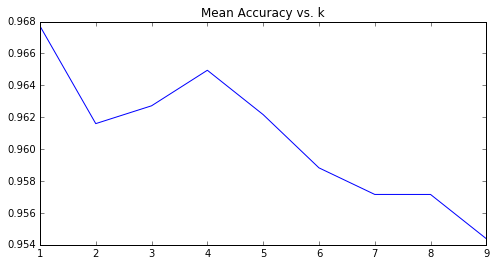

In [9]:
k_values = list(range(1,10))
k_overall_accuracies = []

for k in k_values:
    k_accuracy = cross_vaildate(k)
    k_mean_accuracy = np.mean(k_accuracy)
    k_overall_accuracies.append(k_mean_accuracy)
    
plt.figure(figsize=(8,4))
plt.plot(k_values, k_overall_accuracies)
plt.title("Mean Accuracy vs. k")

# Neural Network With One Hidden Layer

In [10]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import KFold

# 50% Train / test validation
def train_nn(neuron_arch, train_features, train_labels):
    mlp = MLPClassifier(hidden_layer_sizes=neuron_arch)
    mlp.fit(train_features, train_labels)
    return mlp

def test(model, test_features, test_labels):
    predictions = model.predict(test_features)
    train_test_df = pd.DataFrame()
    train_test_df['correct_label'] = test_labels
    train_test_df['predicted_label'] = predictions
    overall_accuracy = sum(train_test_df["predicted_label"] == train_test_df["correct_label"])/len(train_test_df)    
    return overall_accuracy

def cross_validate(neuron_arch):
    fold_accuracies = []
    kf = KFold(n_splits = 4, random_state=2)
    for train_index, test_index in kf.split(data):
        train_features, test_features = data.loc[train_index], data.loc[test_index]
        train_labels, test_labels = labels.loc[train_index], labels.loc[test_index]
       
        model = train_nn(neuron_arch, train_features, train_labels)
        overall_accuracy = test(model, test_features, test_labels)
        fold_accuracies.append(overall_accuracy)
    return fold_accuracies

/dataquest/system/env/python3/lib/python3.4/site-packages/sklearn/neural_network/multilayer_perceptron.py:563: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations reached and the optimization hasn't converged yet.



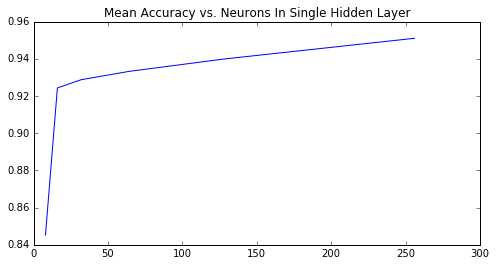

In [11]:
nn_one_neurons = [
    (8,),
    (16,),
    (32,),
    (64,),
    (128,),
    (256,)
]
nn_one_accuracies = []

for n in nn_one_neurons:
    nn_accuracies = cross_validate(n)
    nn_mean_accuracy = np.mean(nn_accuracies)
    nn_one_accuracies.append(nn_mean_accuracy)

plt.figure(figsize=(8,4))
plt.title("Mean Accuracy vs. Neurons In Single Hidden Layer")

x = [i[0] for i in nn_one_neurons]
plt.plot(x, nn_one_accuracies)

In [12]:
nn_one_accuracies

[0.8452981935164563,
 0.9243219500123732,
 0.9287626825043307,
 0.9332108389012621,
 0.9398935906953725,
 0.95102573620391]

1つの隠れ層を使用する時、ニューロンの数が増えると精度も上がることがわかる。精度は約86.5%から約95.4%の値とっている。
k近傍法の精度が約96%であることから、隠れ層が一層のネットワークを用いる利点はないと考えられる。

# Neural Network With Two Hidden Layers

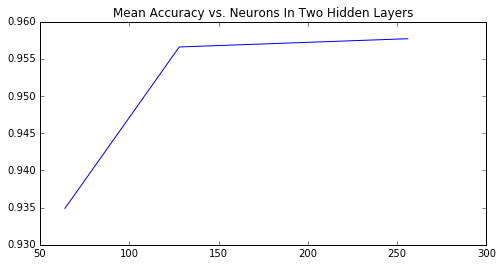

In [13]:
nn_two_neurons = [
    (64,64),
    (128,128),
    (256,256)
]
nn_two_accuracies = []

for n in nn_two_neurons:
    nn_accuracies = cross_validate(n)
    nn_mean_accuracy = np.mean(nn_accuracies)
    nn_two_accuracies.append(nn_mean_accuracy)

plt.figure(figsize=(8,4))
plt.title("Mean Accuracy vs. Neurons In Two Hidden Layers")

x = [i[0] for i in nn_two_neurons]
plt.plot(x, nn_two_accuracies)

In [14]:
print(max(nn_one_accuracies), "\n")
print(nn_two_accuracies)

0.95102573620391 

[0.9348935906953725, 0.9565887156644395, 0.957698589458055]


2つの隠れ層を使用することで、精度が95.8%まで向上した。

# Neural Network With Three Hidden Layers

隠れ層の層数が増えると過学習が起こる可能性が高くなる。その対策として、k分割交差検証の分割数を4から6に増やす。

In [15]:
def cross_validate_six(neuron_arch):
    fold_accuracies = []
    kf = KFold(n_splits = 6, random_state=2)
    for train_index, test_index in kf.split(data):
        train_features, test_features = data.loc[train_index], data.loc[test_index]
        train_labels, test_labels = labels.loc[train_index], labels.loc[test_index]
       
        model = train_nn(neuron_arch, train_features, train_labels)
        overall_accuracy = test(model, test_features, test_labels)
        fold_accuracies.append(overall_accuracy)
    return fold_accuracies

/dataquest/system/env/python3/lib/python3.4/site-packages/sklearn/neural_network/multilayer_perceptron.py:563: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations reached and the optimization hasn't converged yet.



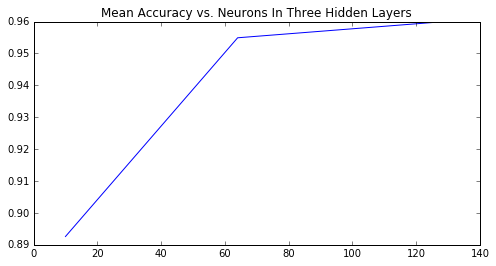

In [16]:
nn_three_neurons = [
    (10,10,10),
    (64,64,64),
    (128,128,128)
]
nn_three_accuracies = []

for n in nn_three_neurons:
    nn_accuracies = cross_validate_six(n)
    nn_mean_accuracy = np.mean(nn_accuracies)
    nn_three_accuracies.append(nn_mean_accuracy)

plt.figure(figsize=(8,4))
plt.title("Mean Accuracy vs. Neurons In Three Hidden Layers")

x = [i[0] for i in nn_three_neurons]
plt.plot(x, nn_three_accuracies)

In [17]:
nn_three_accuracies

[0.8925975473801561, 0.9549256781865477, 0.9599424005945746]

3つの隠れ層を使用することで、精度が96%まで向上した。

以上から、より多くの層とより多くのニューロンを持つことで精度がより向上する傾向にあると言える。